### Run in python console
import nltk; nltk.download('stopwords')

### Run in terminal or command prompt
python3 -m spacy download en

### Import Packages

The core packages used in this tutorial are re, gensim, spacy and pyLDAvis. Besides this we will also using matplotlib, numpy and pandas for data handling and visualization. Let’s import them.

In [1]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

In [2]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel # https://radimrehurek.com/gensim/models/coherencemodel.html

In [3]:
# Spacy for lemmatization
import spacy

#Plotting tools # conda install -c memex pyldavis
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

#### import data

In [4]:
dataframe = pd.read_csv('voted-kaggle-dataset.csv')
#dataframe['Description']
dataframe.head()

,Title,Subtitle,Owner,Votes,Last Update,Tags,Data Type,Size,License,Views,Download,Kernels,Topics,URL,Description
0,Credit Card Fraud Detection,Anonymized credit card transactions labeled as...,Machine Learning Group - ULB,1233,2016-11-05,crime\nfinance,CSV,144 MB,ODbL,"440,221 views","52,793 downloads","1,778 kernels",26 topics,https://www.kaggle.com/mlg-ulb/creditcardfraud,The datasets contains transactions made by cre...
1,European Soccer Database,"25k+ matches, players & teams attributes for E...",Hugo Mathien,1035,2016-10-24,association football\neurope,SQLite,299 MB,ODbL,"393,924 views","46,025 downloads","1,459 kernels",75 topics,https://www.kaggle.com/hugomathien/soccer,The ultimate Soccer database for data analysis...
2,TMDB 5000 Movie Dataset,"Metadata on ~5,000 movies from TMDb",The Movie Database (TMDb),1018,2017-09-28,film,CSV,44 MB,Other,"444,535 views","61,705 downloads","1,394 kernels",46 topics,https://www.kaggle.com/tmdb/tmdb-movie-metadata,Background\nWhat can we say about the success ...
3,Human Resources Analytics,Why are our best and most experienced employee...,Ludovic Benistant,832,2016-11-30,employment,CSV,553 KB,CC4,"309,644 views","47,350 downloads","1,772 kernels",32 topics,https://www.kaggle.com/ludobenistant/hr-analytics,This dataset is simulated\nWhy are our best an...
4,Global Terrorism Database,"More than 170,000 terrorist attacks worldwide,...",START Consortium,785,2017-07-19,crime\nterrorism\ninternational relations,CSV,144 MB,Other,"186,621 views","26,091 downloads",609 kernels,11 topics,https://www.kaggle.com/START-UMD/gtd,"Context\nInformation on more than 170,000 Terr..."


In [5]:
# !pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns
from nltk import FreqDist
def freq_words(text_data, terms):
    all_words = ' '.join([str(text) for text in text_data])
    all_words = all_words.split()
    
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})
    
    #selecting top 20 most frequent words
    most_frequent_word = words_df.nlargest(columns='count', n=terms)
    plt.figure(figsize=(20,5))
    ax = sns.barplot(data=most_frequent_word, x='word', y='count')
    ax.set(ylabel='Count')
    plt.show()

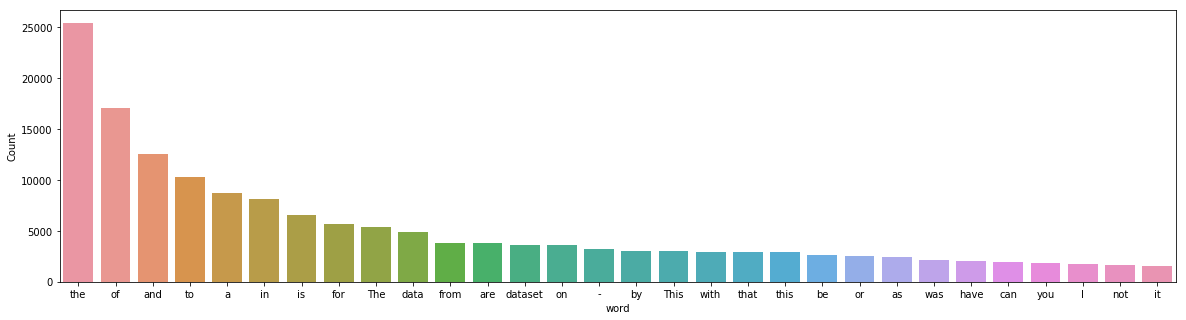

In [6]:
freq_words(dataframe['Description'], terms=30)

In [7]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print(stop_words)
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [8]:
# Convert to list
data = dataframe['Description'].tolist()

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', str(sent)) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

pprint(data[:1])

<>:5: DeprecationWarning: invalid escape sequence \S
<>:8: DeprecationWarning: invalid escape sequence \s
<>:5: DeprecationWarning: invalid escape sequence \S
<>:8: DeprecationWarning: invalid escape sequence \s
<>:5: DeprecationWarning: invalid escape sequence \S
<>:8: DeprecationWarning: invalid escape sequence \s
<ipython-input-8-f8b73b705db2>:5: DeprecationWarning: invalid escape sequence \S
  data = [re.sub('\S*@\S*\s?', '', str(sent)) for sent in data]
<ipython-input-8-f8b73b705db2>:8: DeprecationWarning: invalid escape sequence \s
  data = [re.sub('\s+', ' ', sent) for sent in data]


['The datasets contains transactions made by credit cards in September 2013 by '
 'european cardholders. This dataset presents transactions that occurred in '
 'two days, where we have 492 frauds out of 284,807 transactions. The dataset '
 'is highly unbalanced, the positive class (frauds) account for 0.172% of all '
 'transactions. It contains only numerical input variables which are the '
 'result of a PCA transformation. Unfortunately, due to confidentiality '
 'issues, we cannot provide the original features and more background '
 'information about the data. Features V1, V2, ... V28 are the principal '
 'components obtained with PCA, the only features which have not been '
 'transformed with PCA are Time and Amount. Feature Time contains the seconds '
 'elapsed between each transaction and the first transaction in the dataset. '
 'The feature Amount is the transaction Amount, this feature can be used for '
 'example-dependant cost-senstive learning. Feature Class is the response '

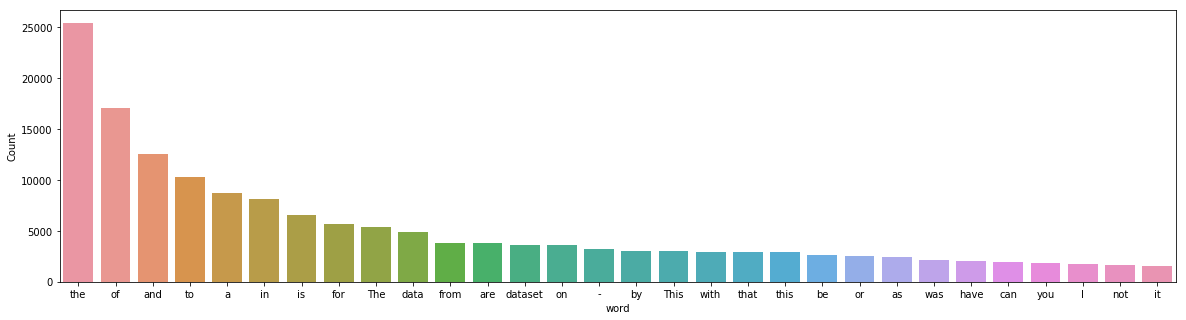

In [9]:
freq_words(data, terms=30)

In [10]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['the', 'datasets', 'contains', 'transactions', 'made', 'by', 'credit', 'cards', 'in', 'september', 'by', 'european', 'cardholders', 'this', 'dataset', 'presents', 'transactions', 'that', 'occurred', 'in', 'two', 'days', 'where', 'we', 'have', 'frauds', 'out', 'of', 'transactions', 'the', 'dataset', 'is', 'highly', 'unbalanced', 'the', 'positive', 'class', 'frauds', 'account', 'for', 'of', 'all', 'transactions', 'it', 'contains', 'only', 'numerical', 'input', 'variables', 'which', 'are', 'the', 'result', 'of', 'pca', 'transformation', 'unfortunately', 'due', 'to', 'confidentiality', 'issues', 'we', 'cannot', 'provide', 'the', 'original', 'features', 'and', 'more', 'background', 'information', 'about', 'the', 'data', 'features', 'are', 'the', 'principal', 'components', 'obtained', 'with', 'pca', 'the', 'only', 'features', 'which', 'have', 'not', 'been', 'transformed', 'with', 'pca', 'are', 'time', 'and', 'amount', 'feature', 'time', 'contains', 'the', 'seconds', 'elapsed', 'between', '

In [11]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['the', 'datasets', 'contains', 'transactions', 'made', 'by', 'credit', 'cards', 'in', 'september', 'by', 'european', 'cardholders', 'this', 'dataset', 'presents', 'transactions', 'that', 'occurred', 'in', 'two', 'days', 'where', 'we', 'have', 'frauds', 'out', 'of', 'transactions', 'the', 'dataset', 'is', 'highly', 'unbalanced', 'the', 'positive', 'class', 'frauds', 'account', 'for', 'of', 'all', 'transactions', 'it', 'contains', 'only', 'numerical', 'input', 'variables', 'which', 'are', 'the', 'result', 'of', 'pca', 'transformation', 'unfortunately', 'due', 'to', 'confidentiality', 'issues', 'we', 'cannot', 'provide', 'the', 'original', 'features', 'and', 'more', 'background', 'information', 'about', 'the', 'data', 'features', 'are', 'the', 'principal', 'components', 'obtained', 'with', 'pca', 'the', 'only', 'features', 'which', 'have', 'not', 'been', 'transformed', 'with', 'pca', 'are', 'time', 'and', 'amount', 'feature', 'time', 'contains', 'the', 'seconds', 'elapsed', 'between', 'e

### remove the stopwords

In [12]:
def remove_stop_words(texts):
    nostop_data_words = list()
    for doc in texts:
        data = list()
        for word in simple_preprocess(str(doc)):
            if word not in stop_words:
               data.append(word)
        nostop_data_words.append(data)
    
    return nostop_data_words
    

#### make bigram, trigram

In [13]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]


def make_trigram(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]
    

### lemmatization

In [14]:
def lemmatization(texts, allowed_postags):
    texts_output = []
    nlp = spacy.load('en', disable=['parser', 'ner'])
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_output.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
        
    return texts_output



In [15]:
nostop_data_words = remove_stop_words(data_words)
print(nostop_data_words[:1])
data_words_bigram = make_bigrams(nostop_data_words)

data_lemma = lemmatization(texts = data_words_bigram, allowed_postags=['NOUN','ADJ','VERB','ADV'])

[['datasets', 'contains', 'transactions', 'made', 'credit', 'cards', 'september', 'european', 'cardholders', 'dataset', 'presents', 'transactions', 'occurred', 'two', 'days', 'frauds', 'transactions', 'dataset', 'highly', 'unbalanced', 'positive', 'class', 'frauds', 'account', 'transactions', 'contains', 'numerical', 'input', 'variables', 'result', 'pca', 'transformation', 'unfortunately', 'due', 'confidentiality', 'issues', 'cannot', 'provide', 'original', 'features', 'background', 'information', 'data', 'features', 'principal', 'components', 'obtained', 'pca', 'features', 'transformed', 'pca', 'time', 'amount', 'feature', 'time', 'contains', 'seconds', 'elapsed', 'transaction', 'first', 'transaction', 'dataset', 'feature', 'amount', 'transaction', 'amount', 'feature', 'used', 'example', 'dependant', 'cost', 'senstive', 'learning', 'feature', 'class', 'response', 'variable', 'takes', 'value', 'case', 'fraud', 'otherwise', 'given', 'class', 'imbalance', 'ratio', 'recommend', 'measuring

In [16]:
print(data_lemma[:1])

[['dataset', 'contain', 'transaction', 'make', 'credit', 'card', 'september', 'european', 'cardholder', 'dataset', 'present', 'transaction', 'occur', 'day', 'fraud', 'transaction', 'dataset', 'highly', 'unbalanced', 'positive', 'class', 'fraud', 'account', 'transaction', 'contain', 'numerical', 'input', 'variable', 'result', 'transformation', 'unfortunately', 'due', 'confidentiality', 'issue', 'can', 'not', 'provide', 'original', 'feature', 'background', 'information', 'datum', 'feature', 'principal', 'component', 'obtain', 'pca', 'feature', 'transform', 'pca', 'time', 'amount', 'feature', 'time', 'contain', 'second', 'elapse', 'transaction', 'first', 'transaction', 'dataset', 'feature', 'amount', 'transaction', 'amount', 'feature', 'use', 'example', 'dependant', 'cost', 'senstive', 'learn', 'feature', 'class', 'response', 'variable', 'take', 'value', 'case', 'fraud', 'otherwise', 'give', 'class', 'imbalance', 'ratio', 'recommend', 'measure', 'accuracy', 'use', 'area', 'precision', 're

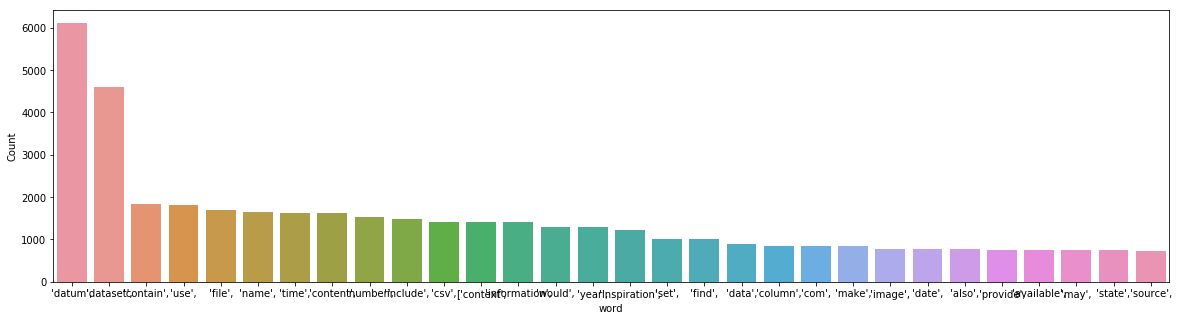

In [17]:
freq_words(data_lemma, terms=30)

#### Gensim creates a unique id for each word in the document. The produced corpus shown above is a mapping of (word_id, word_frequency).

In [18]:
# Create dictionary
# This is used as the input by the LDA model.
id2word = corpora.Dictionary(data_lemma)
texts = data_lemma
corpus = [id2word.doc2bow(text) for text in texts]
print(corpus[:1])

[[(0, 1), (1, 2), (2, 3), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 3), (22, 2), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 3), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 5), (36, 3), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 7), (45, 1), (46, 3), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 3), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 2), (68, 3), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 2), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 2), (101, 1), (102, 7), (103, 1), (104, 1), (105, 4), (106, 3), (107, 1), (108, 1), (109, 1), (110, 2)

#### # Human readable format of corpus (term-frequency)

In [19]:
[[(id2word[id], freq) for id, freq in corpora] for corpora in corpus[:1]]

[[('account', 1),
  ('accuracy', 2),
  ('amount', 3),
  ('analyse', 1),
  ('andrea', 1),
  ('area', 1),
  ('artml', 1),
  ('auprc', 1),
  ('available', 1),
  ('background', 1),
  ('big', 1),
  ('bontempi', 1),
  ('brufence', 1),
  ('bruxell', 1),
  ('caelen', 1),
  ('calibrate', 1),
  ('can', 1),
  ('card', 1),
  ('cardholder', 1),
  ('case', 1),
  ('cidm', 1),
  ('class', 3),
  ('classification', 2),
  ('collaboration', 1),
  ('collect', 1),
  ('component', 1),
  ('computational', 1),
  ('confidentiality', 1),
  ('confusion', 1),
  ('contain', 3),
  ('cost', 1),
  ('credit', 1),
  ('current', 1),
  ('curve', 1),
  ('dal', 1),
  ('dataset', 5),
  ('datum', 3),
  ('day', 1),
  ('dependant', 1),
  ('detail', 1),
  ('due', 1),
  ('elapse', 1),
  ('european', 1),
  ('example', 1),
  ('feature', 7),
  ('first', 1),
  ('fraud', 3),
  ('fraud_detection', 1),
  ('gianluca', 1),
  ('give', 1),
  ('group', 1),
  ('highly', 1),
  ('http', 3),
  ('ieee', 1),
  ('imbalance', 1),
  ('information', 1

In [20]:
# Build LDA model
LDA = gensim.models.ldamodel.LdaModel
lda_model = LDA(corpus=corpus,
                id2word=id2word,
                num_topics=20, 
                random_state=100,
                update_every=1,
                chunksize=100,
                passes=10,
                alpha='auto',
                per_word_topics=True)

/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.s

/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.s

/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.s

/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.s

/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.s

/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.s

/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.s

/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.s

/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.s

/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.s

/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.s

/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.s

/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.s

/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.s

/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.s

/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.s

/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.s

/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.s

/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.s

/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.s

/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.s

/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.s

/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.s

/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.s

/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.s

/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.s

/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.s

/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.s

/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.s

/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.s

In [21]:
from gensim.test.utils import datapath
model_name = '/home/akash/Dev/Topic modeling/LDA_model'
temp_file = datapath(model_name)

# Save model to disk.
lda_model.save(temp_file)

/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [22]:
# Load a potentially pretrained model from disk.
lda_model = LDA.load(temp_file)

In [23]:
# https://rare-technologies.com/what-is-topic-coherence/

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemma, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

# a measure of how good the model is. lower the better.
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus)) 


Coherence Score:  0.4563834283392326


/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.s

/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.s

/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.s

/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.s

/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.s

/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.s

/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.s


Perplexity:  -8.463145749868971


/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.s

In [24]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.369912  0.070911       1        1  29.164864
5      0.258895  0.150550       2        1  12.085821
7      0.174681 -0.061317       3        1   7.213373
3      0.116576 -0.185095       4        1   6.861357
13     0.096345 -0.119400       5        1   5.414659
1      0.058939 -0.170256       6        1   4.322936
6     -0.017194 -0.070754       7        1   3.790993
0     -0.026397 -0.037725       8        1   3.480597
18    -0.003943  0.177524       9        1   3.341570
16    -0.064420  0.057435      10        1   3.000494
19    -0.067519  0.044092      11        1   2.746400
10    -0.144291  0.018498      12        1   2.670972
17    -0.078902  0.033900      13        1   2.495646
8     -0.078640 -0.017390      14        1   2.476960
15    -0.078053  0.105706      15        1   2.012634
12    -0.088070 -0.065060      16        1   1.936289
9     -0.038877  0.101333      17        1   1.843723
2     -0.130511 -0.004186      18        1   1.772587
14    -0.133243 -0.008890      19        1   1.714866
11    -0.125286 -0.019873      20        1   1.653263, topic_info=      Category         Freq                  Term        Total  loglift  \
35     Default  6277.000000               dataset  6277.000000  30.0000   
11441  Default  1359.000000       description_yet  1359.000000  29.0000   
215    Default  1724.000000                  name  1724.000000  28.0000   
36     Default  6178.000000                 datum  6178.000000  27.0000   
342    Default  1764.000000                  file  1764.000000  26.0000   
705    Default  1090.000000            university  1090.000000  25.0000   
27121  Default   758.000000  source_serverruntime   758.000000  24.0000   
27107  Default   634.000000               com_bea   634.000000  23.0000   
27127  Default   610.000000           type_mxbean   610.000000  22.0000   
528    Default  1992.000000               context  1992.000000  21.0000   
1407   Default   531.000000                 image   531.000000  20.0000   
1110   Default   637.000000                  city   637.000000  19.0000   
740    Default   953.000000                   csv   953.000000  18.0000   
100    Default  1497.000000                  time  1497.000000  17.0000   
366    Default  1599.000000           inspiration  1599.000000  16.0000   
29     Default  1494.000000               contain  1494.000000  15.0000   
461    Default  1585.000000                 would  1585.000000  14.0000   
110    Default  1725.000000                   use  1725.000000  13.0000   
486    Default  1002.000000                  year  1002.000000  12.0000   
231    Default   435.000000                player   435.000000  11.0000   
411    Default   729.000000              question   729.000000  10.0000   
683    Default   658.000000                 state   658.000000   9.0000   
527    Default  1885.000000               content  1885.000000   8.0000   
9559   Default   392.000000                 front   392.000000   7.0000   
385    Default   351.000000                 movie   351.000000   6.0000   
456    Default   532.000000                  user   532.000000   5.0000   
1058   Default   606.000000                 model   606.000000   4.0000   
10959  Default   308.000000           worlds_larg   308.000000   3.0000   
938    Default   558.000000                  date   558.000000   2.0000   
262    Default   329.000000                  team   329.000000   1.0000   
...        ...          ...                   ...          ...      ...   
9372   Topic20    20.321461                   tom    21.855852   4.0296   
17658  Topic20    18.952459                  yale    20.486851   4.0246   
9540   Topic20    18.890551               bicycle    20.424942   4.0243   
2275   Topic20    18.827253                flight    20.361645   4.0241   
27901  Topic20    18.147636               ioannis    19.682037   4.02

In LDA models, each document is composed of multiple topics. But, typically only one of the topics is dominant. The below code extracts this dominant topic for each sentence and shows the weight of the topic and the keywords in a nicely formatted output.

This way, you will know which document belongs predominantly to which topic.



In [25]:
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        #print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']
    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)    
        
df_topic_sents_keywords=format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_lemma)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,5.0,0.3259,"file, csv, contain, use, dataset, column, mode...","[dataset, contain, transaction, make, credit, ..."
1,1,4.0,0.4608,"datum, dataset, context, content, inspiration,...","[ultimate, soccer, database, datum, analysis, ..."
2,2,4.0,0.4035,"datum, dataset, context, content, inspiration,...","[background, say, success, movie, release, cer..."
3,3,4.0,0.5506,"datum, dataset, context, content, inspiration,...","[dataset, simulate, best, experienced, employe..."
4,4,6.0,0.2867,"university, college, student, research, collec...","[context, information, terrorist_attack, globa..."
5,5,7.0,0.4315,"time, date, question, attribution, get_start, ...","[context, bitcoin, longest_runn, well, know, c..."
6,6,7.0,0.3804,"time, date, question, attribution, get_start, ...","[context, first, time, kaggle, conduct, indust..."
7,7,16.0,0.5208,"image, front, integer, class, attribute, numer...","[iris, dataset, use, fisher, classic, paper, m..."
8,8,4.0,0.4446,"datum, dataset, context, content, inspiration,...","[world, development, indicator, world_bank, co..."
9,9,4.0,0.5069,"datum, dataset, context, content, inspiration,...","[actually, prepare, dataset, student, deep_lea..."


#### Frequency Distribution of Word Counts in Documents

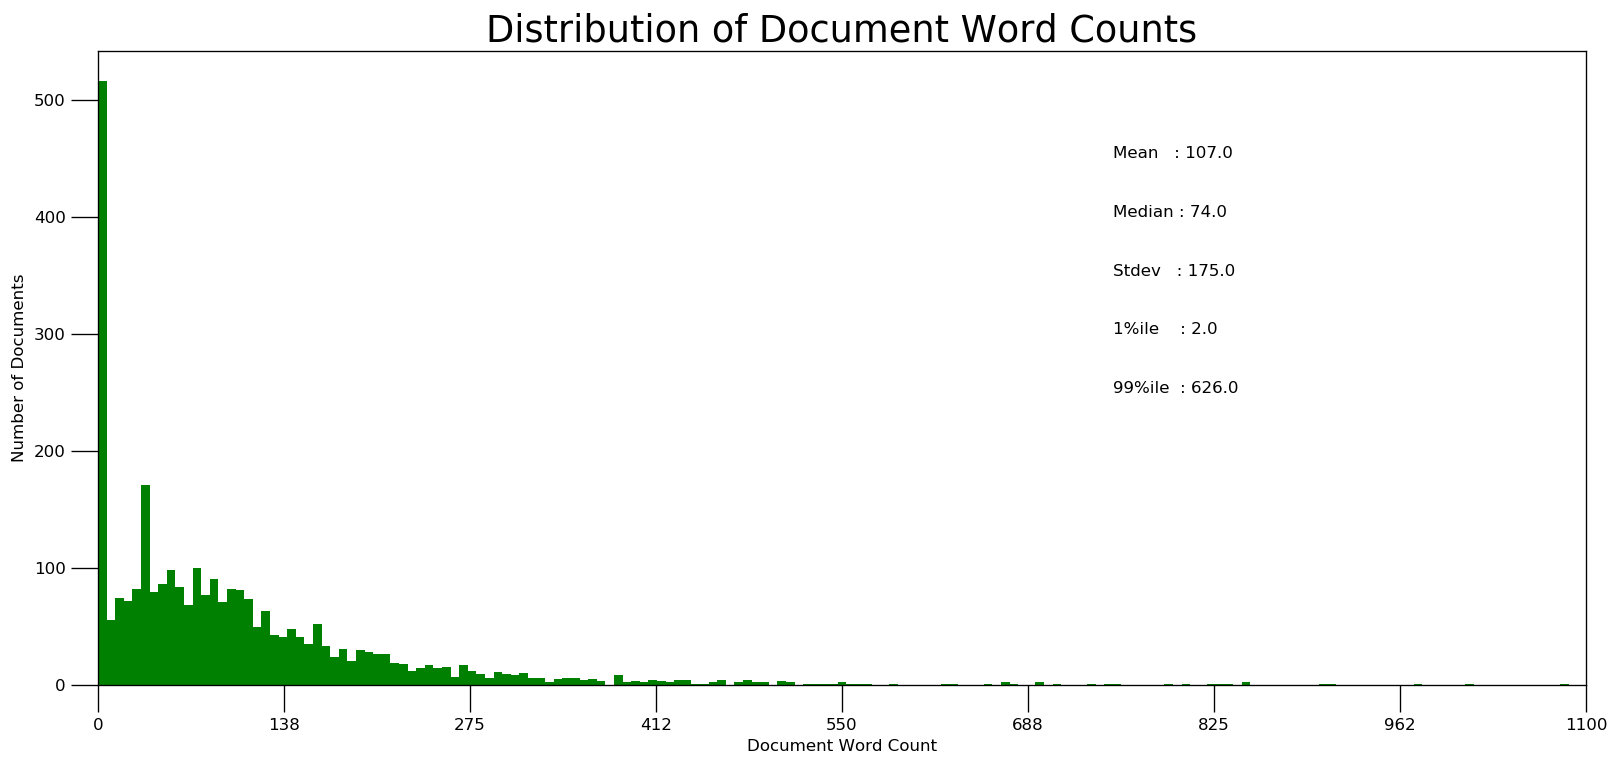

In [33]:
doc_lens = [len(d) for d in df_dominant_topic.Text]

# Plot
plt.figure(figsize=(16,7), dpi=120)
plt.hist(doc_lens, bins = 1000, color='green')
plt.text(750, 450, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(750, 400, "Median : " + str(round(np.median(doc_lens))))
plt.text(750, 350, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(750, 300, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(750, 250, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 1100), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,1100,9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()

/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


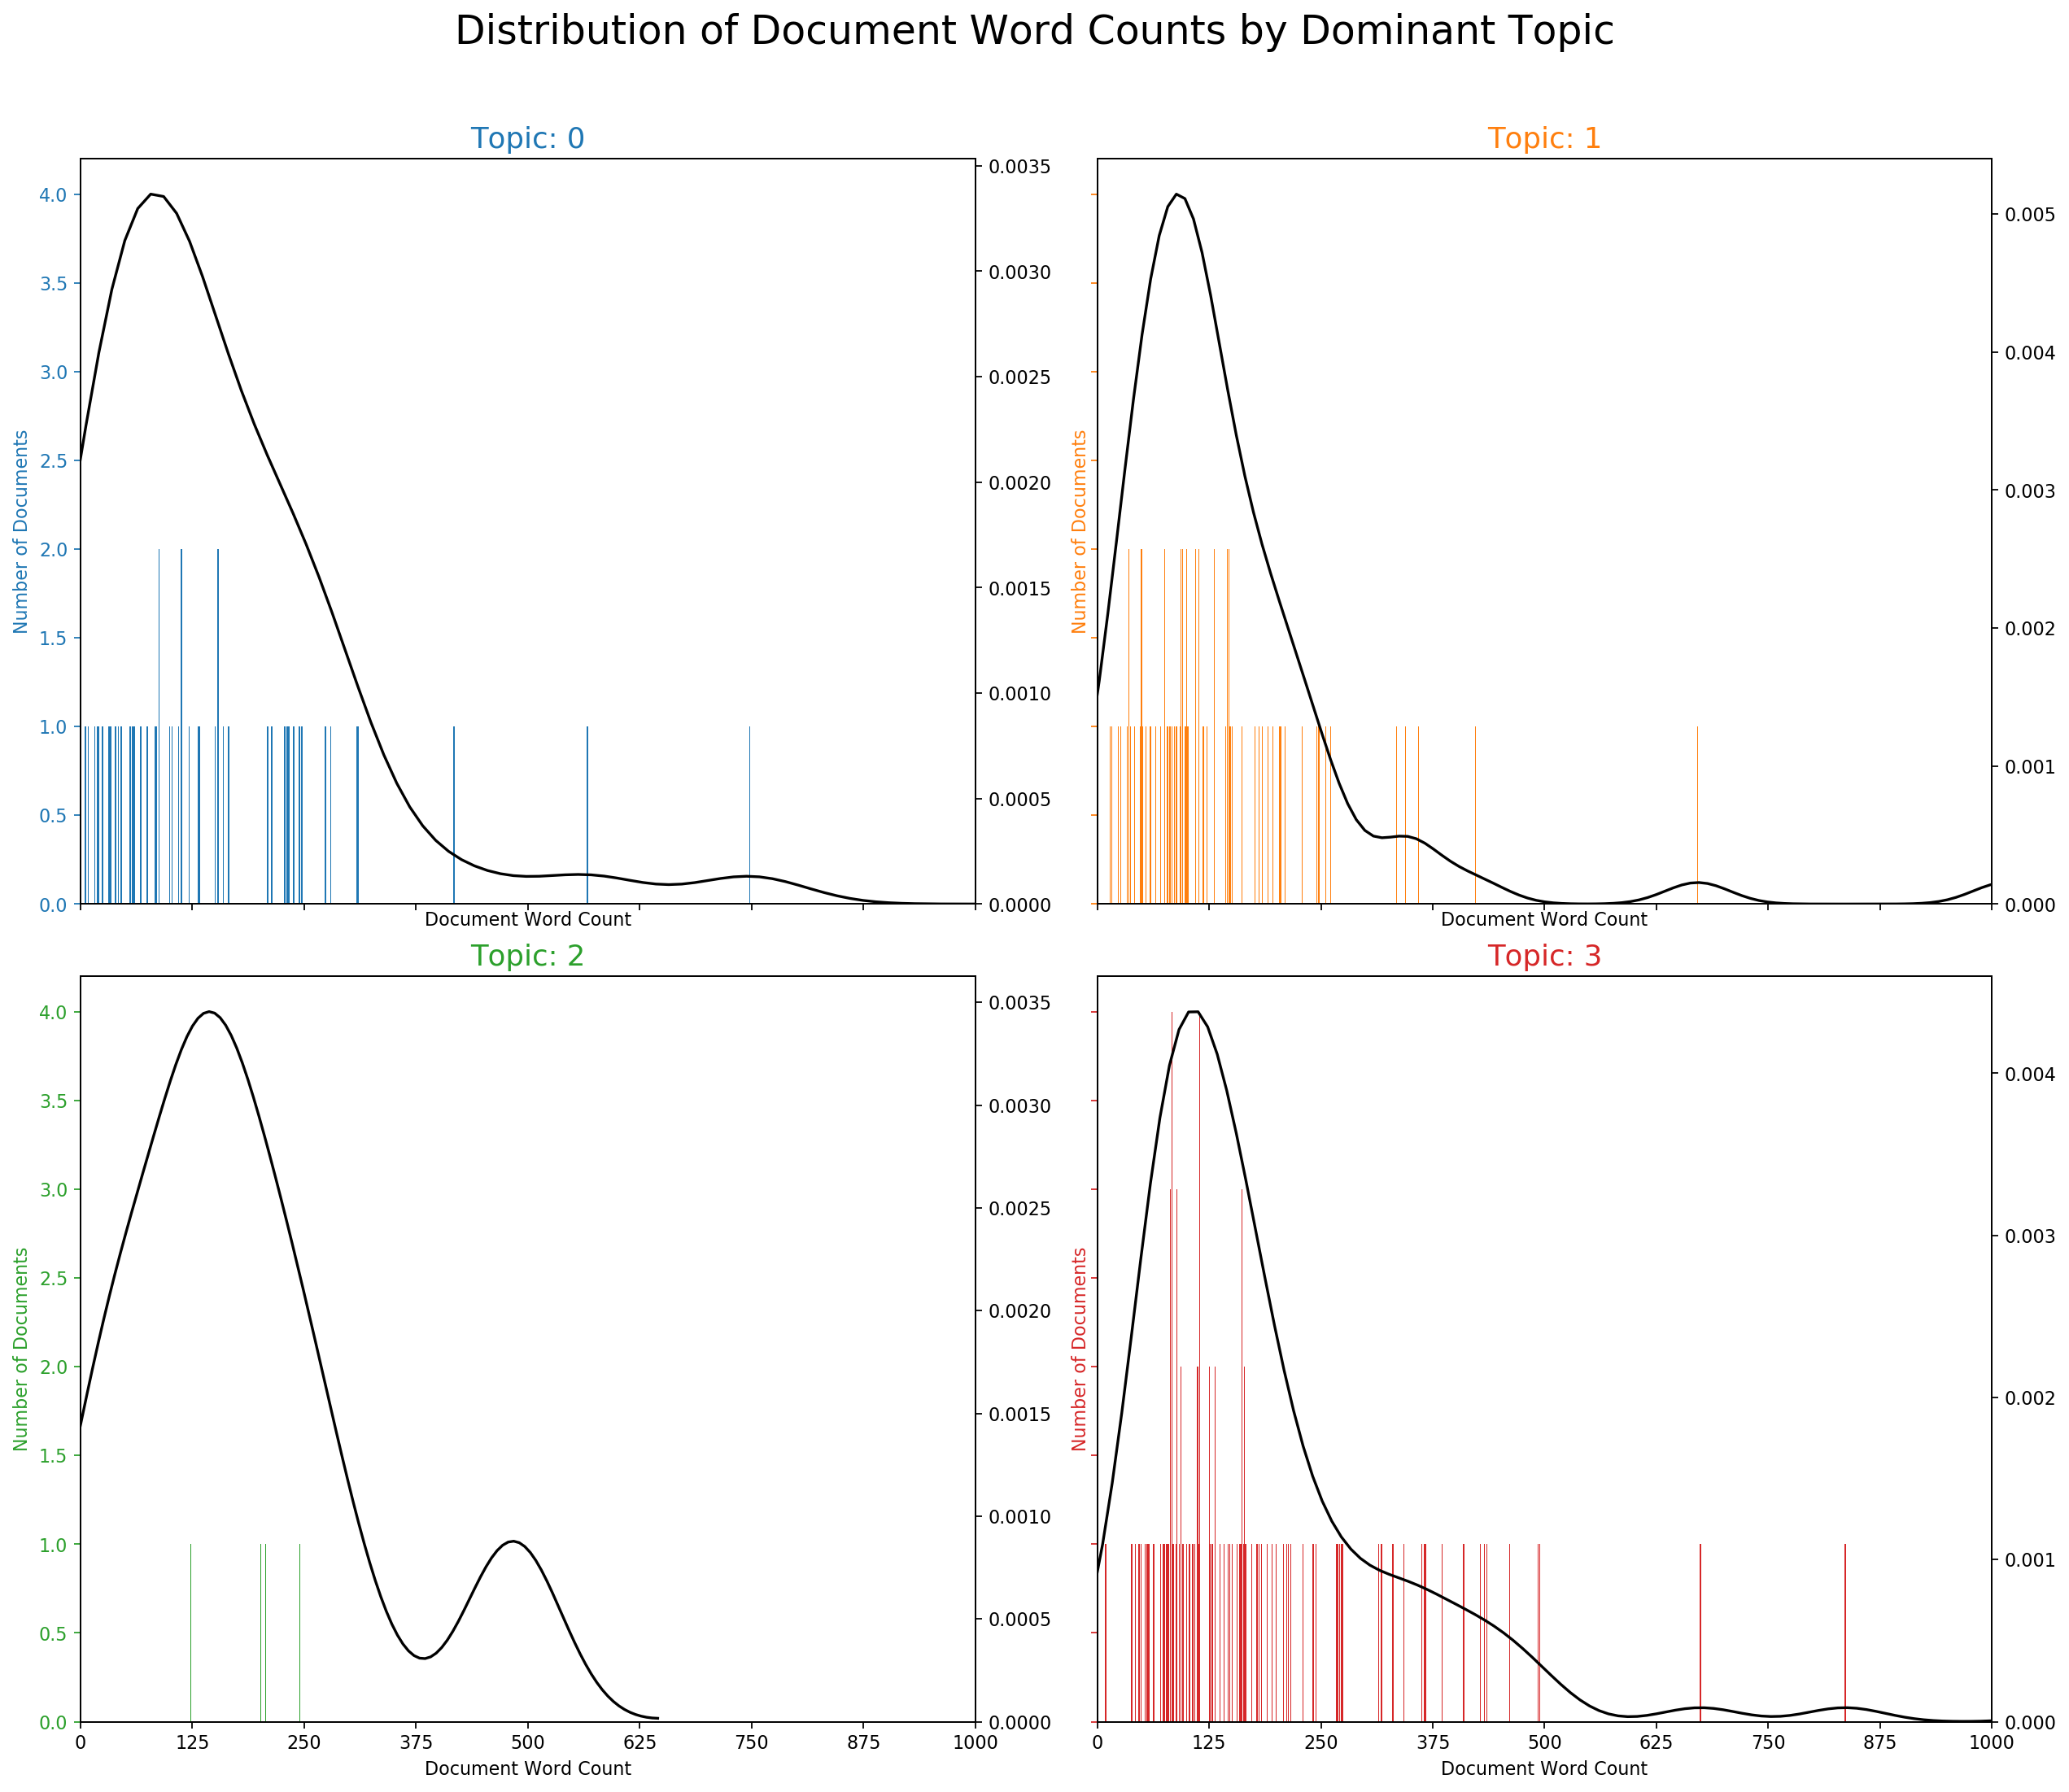

In [27]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(2,2,figsize=(16,14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 1000, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 1000), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,1000,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()

#### t-SNE Clustering Chart

In [32]:
# pip install bokeh

# Get topic weights and dominant topics ------------
# from sklearn.manifold import TSNE
# from bokeh.plotting import figure, output_file, show
# from bokeh.models import Label
# from bokeh.io import output_notebook

# # Get topic weights
# topic_weights = []
# for i, row_list in enumerate(lda_model[corpus]):
#     topic_weights.append([w for i, w in row_list[0]])

# # Array of topic weights    
# arr = pd.DataFrame(topic_weights).fillna(0).values

# # Keep the well separated points (optional)
# arr = arr[np.amax(arr, axis=1) > 0.35]

# # Dominant topic number in each doc
# topic_num = np.argmax(arr, axis=1)

# # tSNE Dimension Reduction
# tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
# tsne_lda = tsne_model.fit_transform(arr)

# # Plot the Topic Clusters using Bokeh
# output_notebook()
# n_topics = 4
# mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
# plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
#               plot_width=900, plot_height=700)
# plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
# # show(plot)